In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# 1. Загрузка данных
data_all = pd.read_csv('data_merged.csv')
data = data_all.iloc[5:]
data_test = data_all.iloc[0:5]
data.head(3)

,Unnamed: 0,Npair,Nm1,Bm1_N,Bm1_S,Fm1_B,Nm2,Bm2_N,Bm2_S,Fm2_B,Bpair_N,Bpair_S,Fpair_N,Fpair_S
5,6,7,112,237,222,5.90,104,224,238,5.91,345,343,11.811024,11.811024
6,7,8,113,236,222,5.87,101,224,237,5.91,343,343,11.811024,11.811024
7,8,9,119,242,217,5.88,140,220,244,5.94,347,349,11.866142,11.866142


In [4]:
# 2. Подготовка данных
X = data[['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']]
y = data[['Bpair_N', 'Bpair_S', 'Fpair_N', 'Fpair_S']]

In [ ]:
# 3. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Предсказание и оценка
y_pred = model.predict(X_test)

print("Оценка модели:")
print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")

Оценка модели:
R²: 0.648
MAE: 0.636


In [8]:
# 6. Пример предсказания для новых данных
new_data = pd.DataFrame([[234, 233, 5.94, 233, 236, 5.96]], 
                        columns=X.columns)
prediction = model.predict(new_data)
print("\nПредсказание для новых данных:")
print(pd.DataFrame(prediction, columns=y.columns))


Предсказание для новых данных:
     Bpair_N     Bpair_S    Fpair_N    Fpair_S
0  343.29904  344.276393  11.920566  11.922218


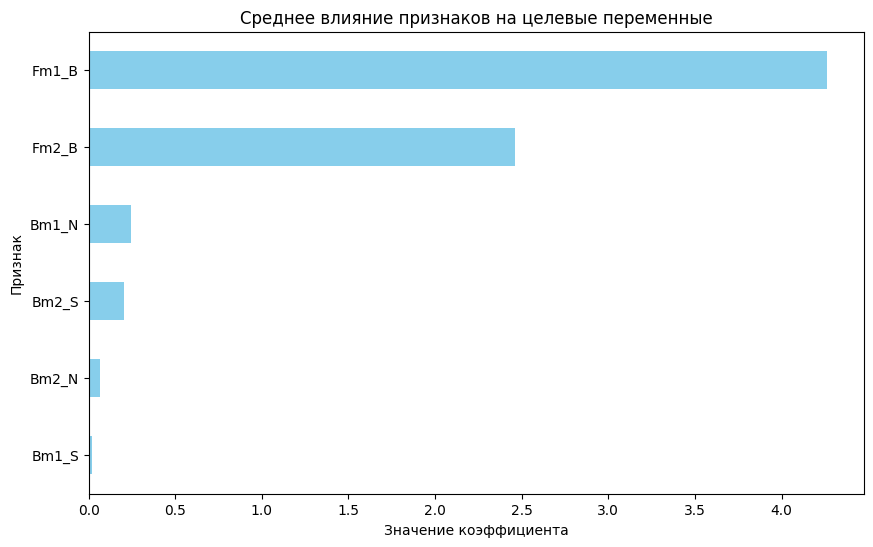

In [10]:
# 7. Визуализация важности признаков (коэффициенты)
plt.figure(figsize=(10, 6))
features = X.columns
coef = pd.DataFrame(model.coef_, columns=features, index=y.columns)
coef.mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Среднее влияние признаков на целевые переменные')
plt.xlabel('Значение коэффициента')
plt.ylabel('Признак')
plt.show()